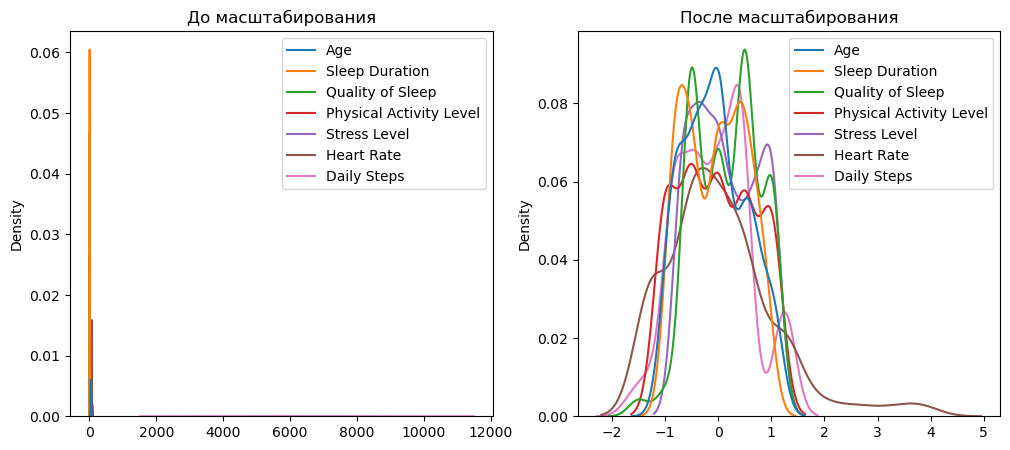

StandardScaler：
        Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0 -1.084746       -0.785714              -0.5                     -0.6   
1 -1.016949       -0.714286              -0.5                      0.0   
2 -1.016949       -0.714286              -0.5                      0.0   
3 -1.016949       -0.928571              -1.5                     -1.0   
4 -1.016949       -0.928571              -1.5                     -1.0   

   Stress Level  Heart Rate  Daily Steps  
0      0.333333        1.75    -1.166667  
1      1.000000        1.25     1.250000  
2      1.000000        1.25     1.250000  
3      1.000000        3.75    -1.666667  
4      1.000000        3.75    -1.666667  


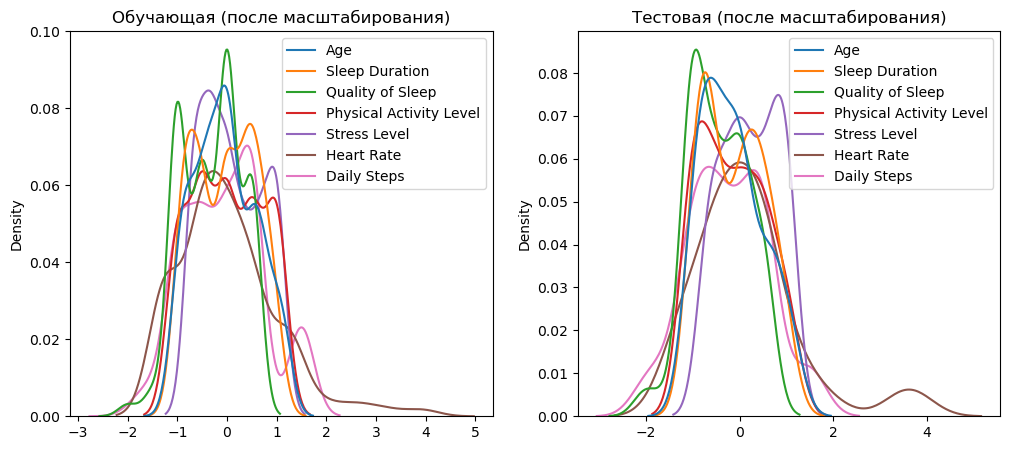

StandardScaler结果：
Обучающая выборка:
        Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0  0.000000       -0.538462              -1.0                -0.500000   
1 -0.714286       -0.923077              -1.0                -1.000000   
2 -0.571429        0.230769               0.0                 0.000000   
3  1.142857        0.769231               0.5                 0.500000   
4 -1.000000       -0.538462              -1.5                -0.666667   

   Stress Level  Heart Rate  Daily Steps  
0      0.666667         0.5         -0.5  
1      1.000000         0.5         -1.0  
2      0.000000         0.0          0.5  
3     -0.666667        -0.5          0.0  
4      0.666667         2.5         -1.5  

Тестовая выборка:
        Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0  0.714286        1.000000               0.5                     -1.0   
1 -0.857143       -0.846154              -1.0                     -1.0   
2 -1.000000       -

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# 加载数据集
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# 确定数值特征
numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Daily Steps']

# 初始化StandardScaler
#scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler = RobustScaler()

# 拟合和转换数据
data_scaled = scaler.fit_transform(data[numeric_features])
data_scaled = pd.DataFrame(data_scaled, columns=numeric_features)

# 绘制缩放前后的密度图
plt.figure(figsize=(12, 5))

# 缩放前
plt.subplot(1, 2, 1)
sns.kdeplot(data=data[numeric_features])
plt.title('До масштабирования')

# 缩放后
plt.subplot(1, 2, 2)
sns.kdeplot(data=data_scaled)
plt.title('После масштабирования')

plt.show()

# 输出缩放后的数据
print("StandardScaler：")
print(data_scaled.head())

# 分割数据集为训练集和测试集
X_train, X_test = train_test_split(data[numeric_features], test_size=0.2, random_state=42)

# 对训练集和测试集分别进行缩放
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 转换为DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_features)

# 绘制训练集和测试集的密度图
plt.figure(figsize=(12, 5))

# 训练集
plt.subplot(1, 2, 1)
sns.kdeplot(data=X_train_scaled)
plt.title('Обучающая (после масштабирования)')

# 测试集
plt.subplot(1, 2, 2)
sns.kdeplot(data=X_test_scaled)
plt.title('Тестовая (после масштабирования)')

plt.show()

# 输出缩放后的数据
print("StandardScaler结果：")
print("Обучающая выборка:")
print(X_train_scaled.head())
print("\nТестовая выборка:")
print(X_test_scaled.head())


Physical Activity Level - Before Outlier Handling


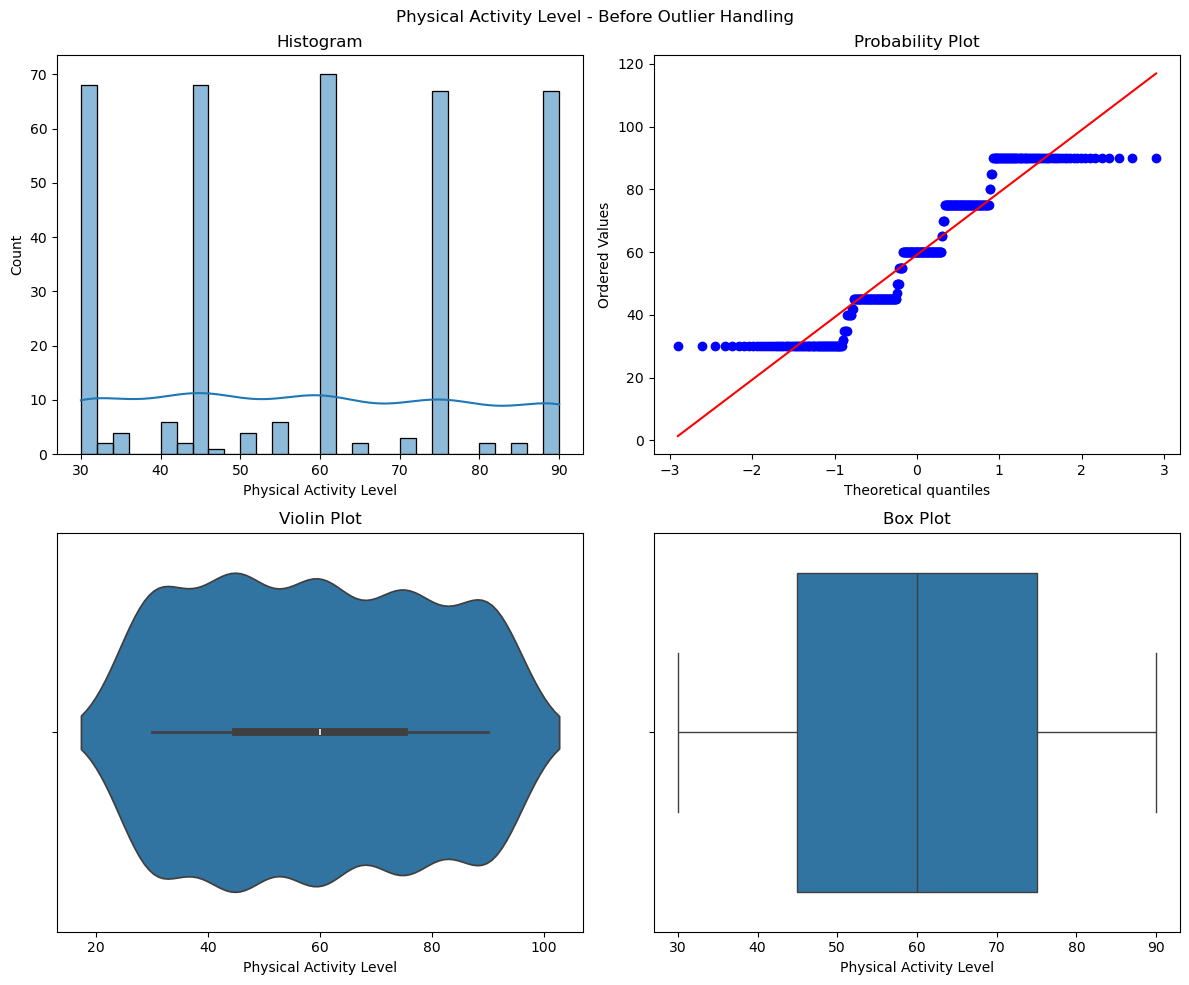

Physical Activity Level - After Outlier Handling


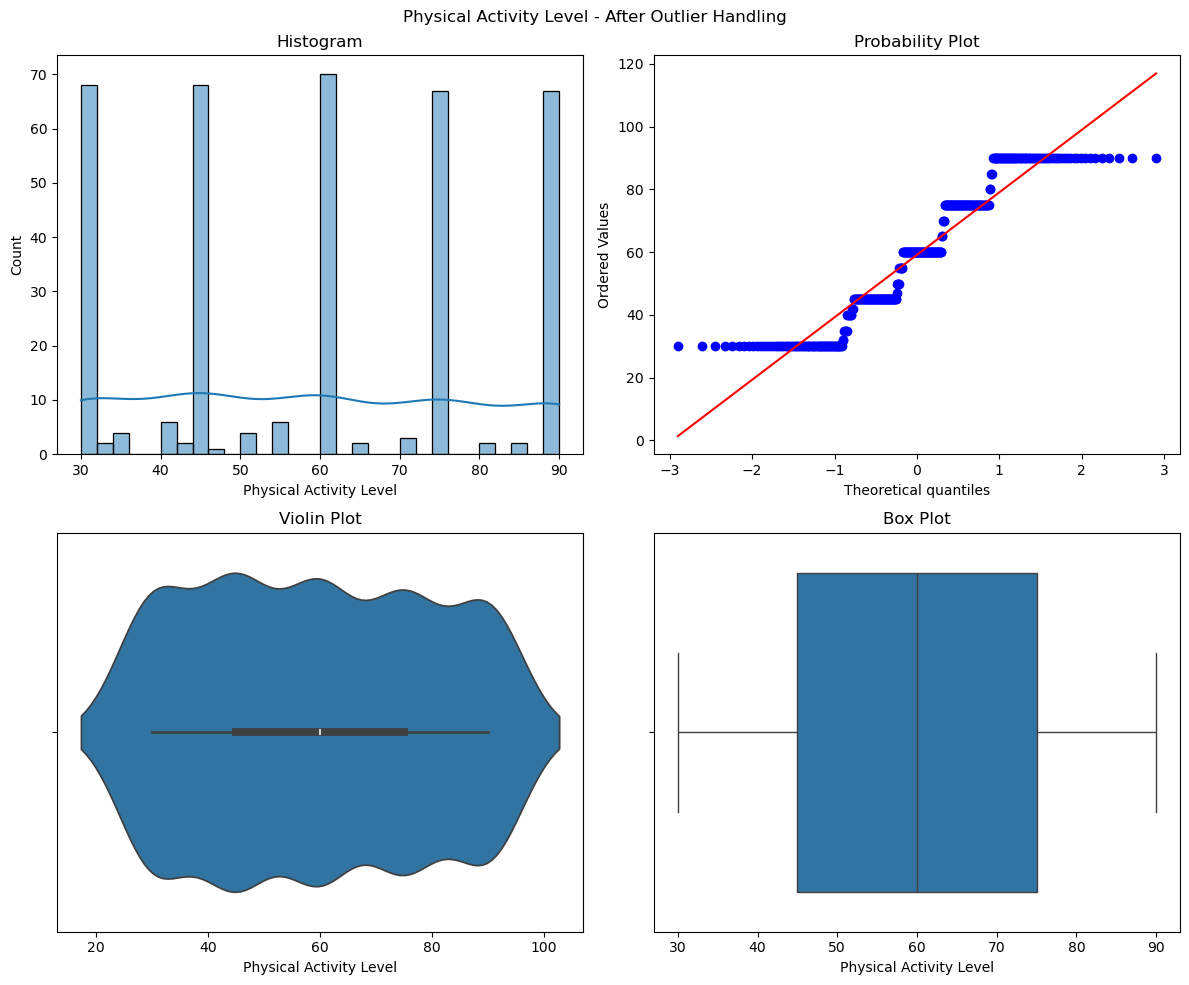

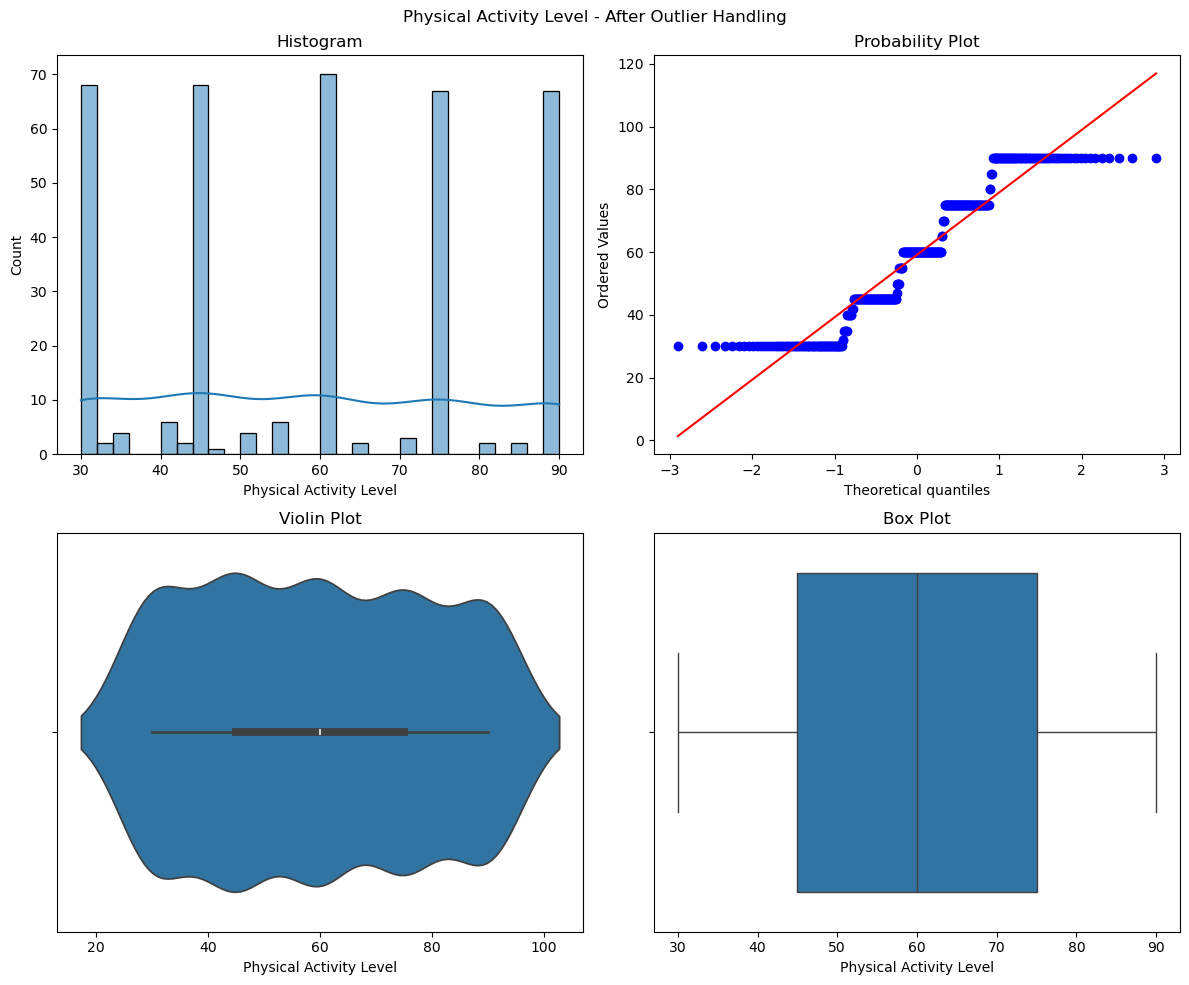

Stress Level - Before Outlier Handling


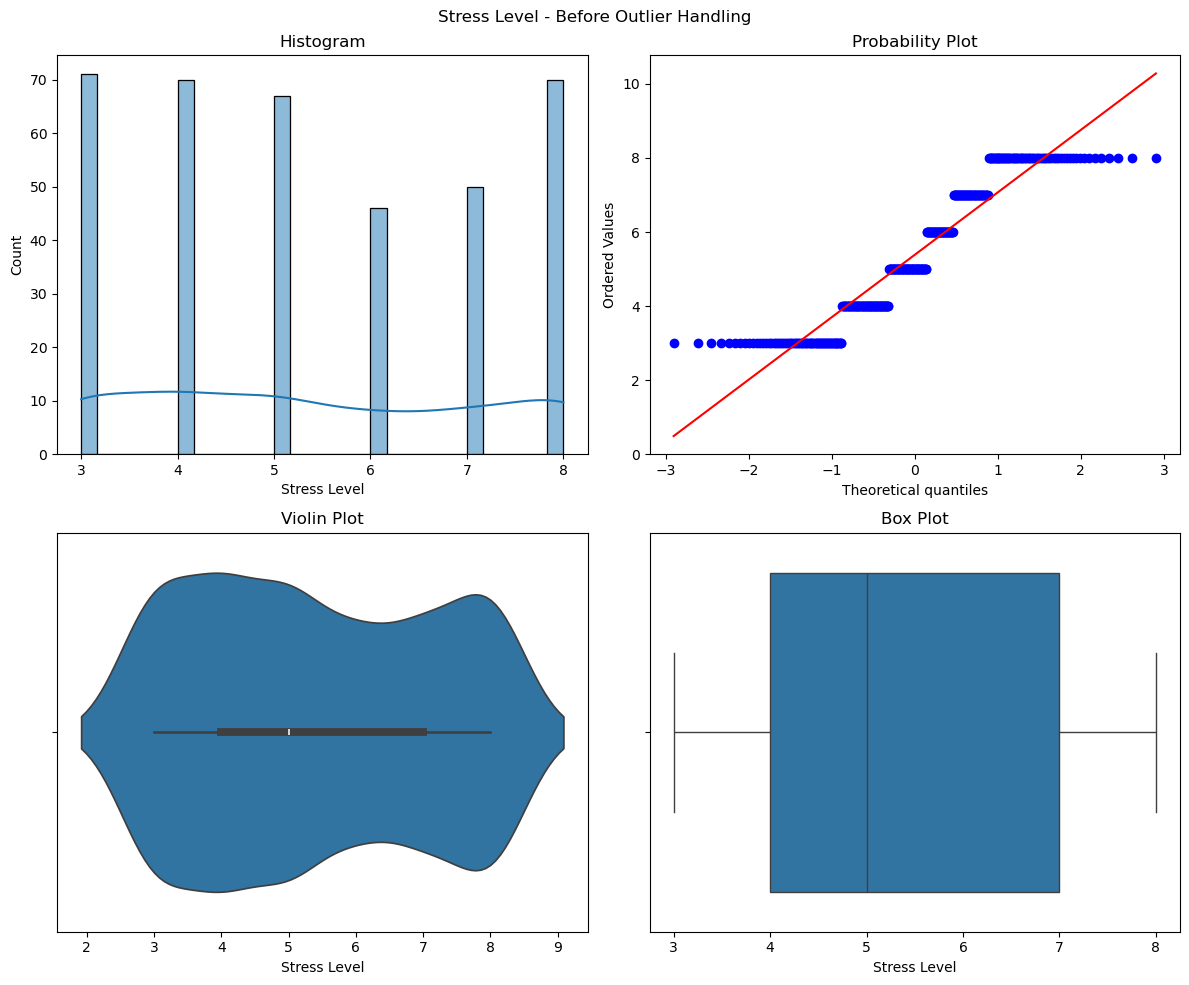

Stress Level - After Outlier Handling


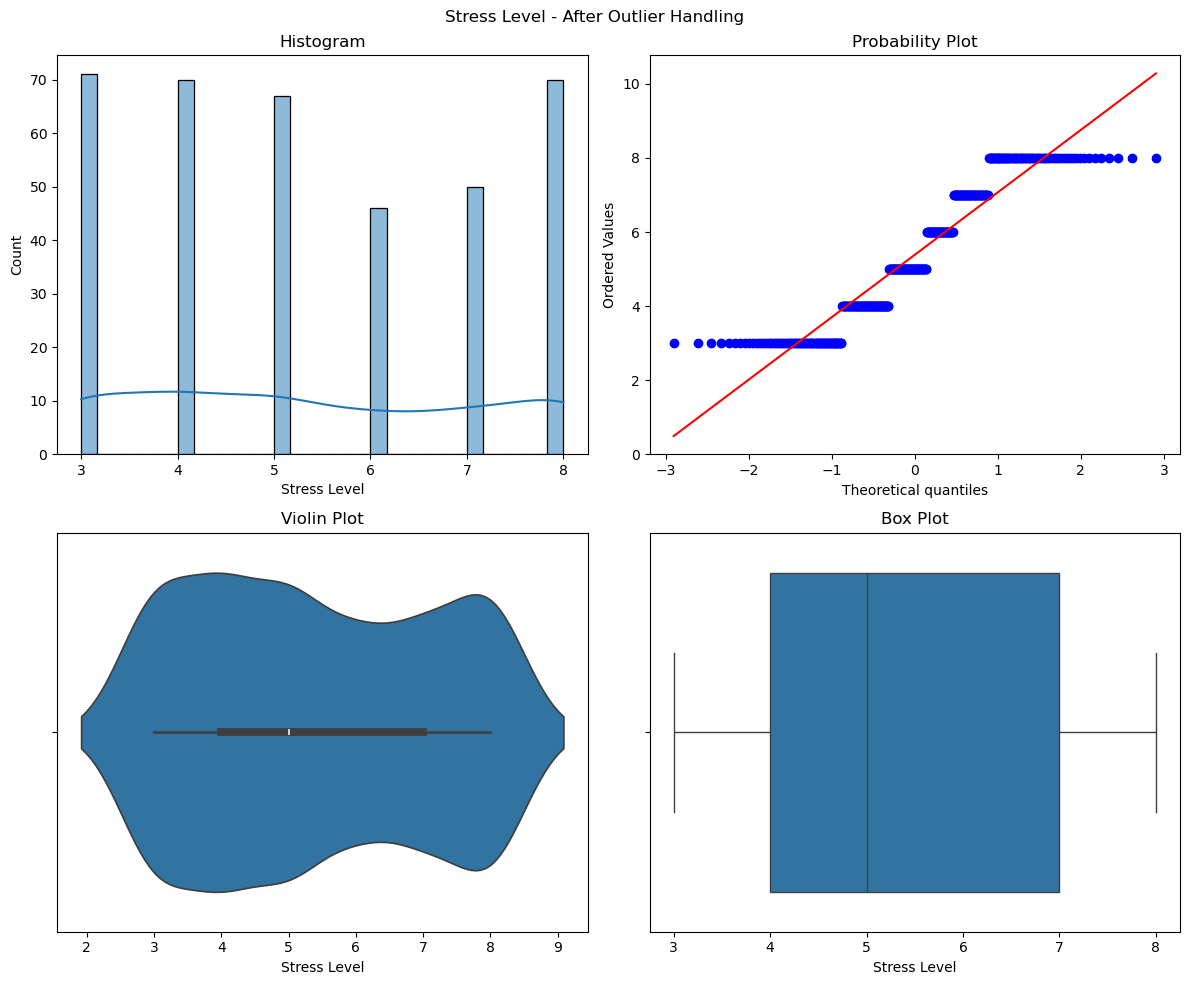

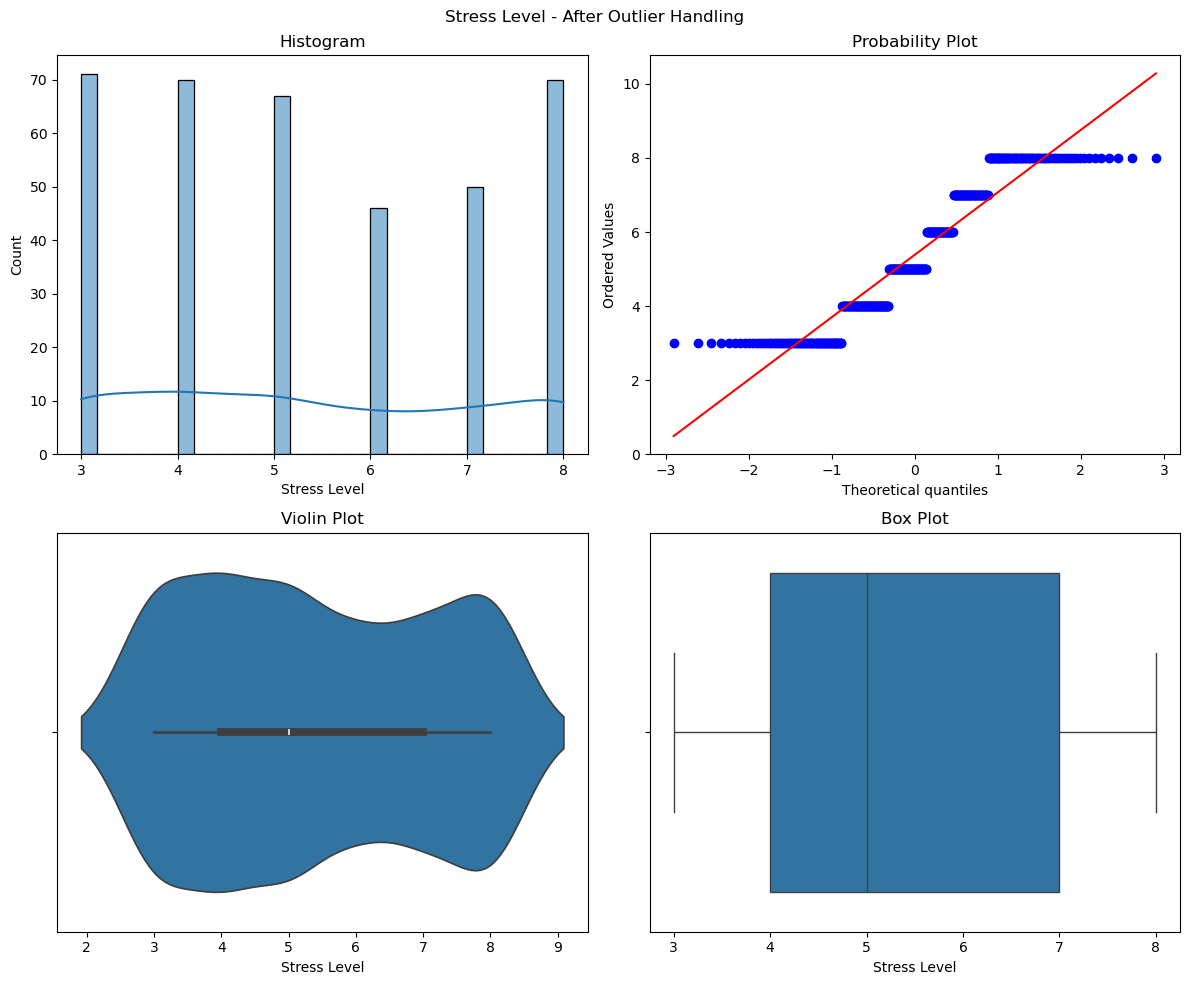

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

# 读取数据集
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# 定义数值特征列表
numerical_features = ['Physical Activity Level', 'Stress Level']

# 定义一个函数来替换异常值
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean = df[column].mean()
    df[column] = np.where(df[column] < lower_bound, mean, np.where(df[column] > upper_bound, mean, df[column]))
    return df
    
# 定义一个函数来删除异常值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# 定义一个函数来绘制四种图形
def plot_four_graphs(data, column, title):
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(title)
    
    # 直方图
    plt.subplot(2, 2, 1)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title('Histogram')
    
    # 概率图
    plt.subplot(2, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title('Probability Plot')
    
    # 小提琴图
    plt.subplot(2, 2, 3)
    sns.violinplot(x=data[column])
    plt.title('Violin Plot')
    
    # 箱线图
    plt.subplot(2, 2, 4)
    sns.boxplot(x=data[column])
    plt.title('Box Plot')
    
    plt.tight_layout()
    plt.show()

# 处理每个数值特征
for feature in numerical_features:
    # 处理前的数据
    print(f'{feature} - Before Outlier Handling')
    plot_four_graphs(df, feature, f'{feature} - Before Outlier Handling')
    
    # 替换异常值
    df_replaced = df.copy()
    replace_outliers(df_replaced, feature)
    
    # 删除异常值
    df_removed = remove_outliers(df, feature)

    # 处理后的数据
    print(f'{feature} - After Outlier Handling')
    plot_four_graphs(df_replaced, feature, f'{feature} - After Outlier Handling')
    plot_four_graphs(df_removed, feature, f'{feature} - After Outlier Handling')
 


Raw data：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
   Pers

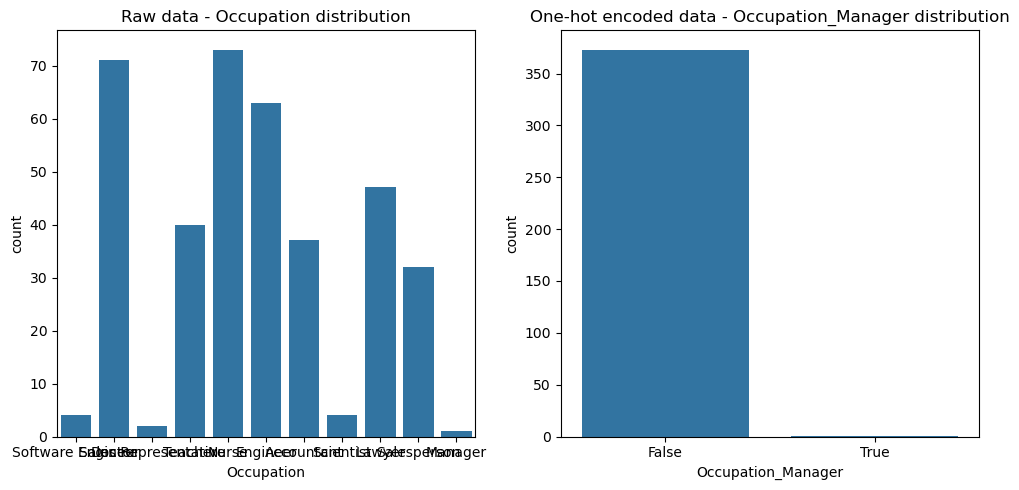

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# 查看原始数据
print("Raw data：")
print(df.info())
print(df.head())

# 独热编码处理
df_onehot = pd.get_dummies(df, columns=['Occupation'], prefix='Occupation')

# 查看处理后的数据集信息
print("\nOne-hot encoded data：")
print(df_onehot.info())
print(df_onehot.head())

# 可视化原始数据的 'Occupation' 分布
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Occupation', data=df)
plt.title('Raw data - Occupation distribution')

# 可视化处理后的数据的 'Occupation' 分布
plt.subplot(1, 2, 2)
# 由于独热编码后 'Occupation' 列被拆分为多个列，这里展示其中一个列的分布
sns.countplot(x='Occupation_Manager', data=df_onehot)
plt.title('One-hot encoded data - Occupation_Manager distribution')

plt.tight_layout()
plt.show()


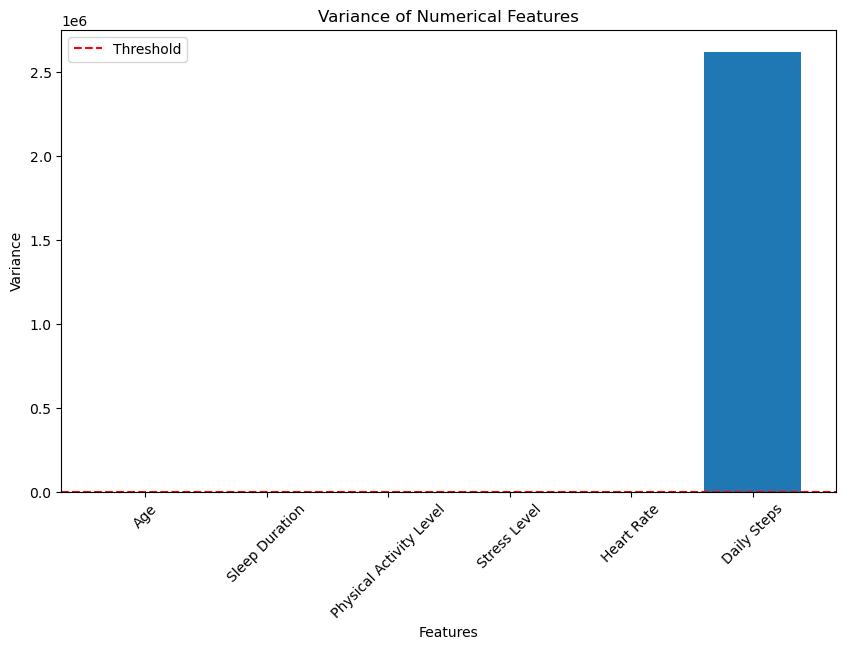

被选中的特征: ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

# 加载数据集
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# 确定数值特征
numerical_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Daily Steps']
X = df[numerical_features]
y = df['Quality of Sleep']  # 假设 'Quality of Sleep' 是目标变量

# 方差选择法，删除低方差特征
selector = VarianceThreshold(threshold=0.1)  # 设置方差阈值
X_selected = selector.fit_transform(X)

# 获取被选中的特征名称
selected_features = X.columns[selector.get_support()]

# 绘制方差图
variances = X.apply(lambda col: col.var(), axis=0)
plt.figure(figsize=(10, 6))
plt.bar(numerical_features, variances)
plt.axhline(y=0.1, color='r', linestyle='--', label='Threshold')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Numerical Features')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("被选中的特征:", selected_features.tolist())


c:\ProgramData\anaconda3\envs\DL-py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\envs\DL-py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

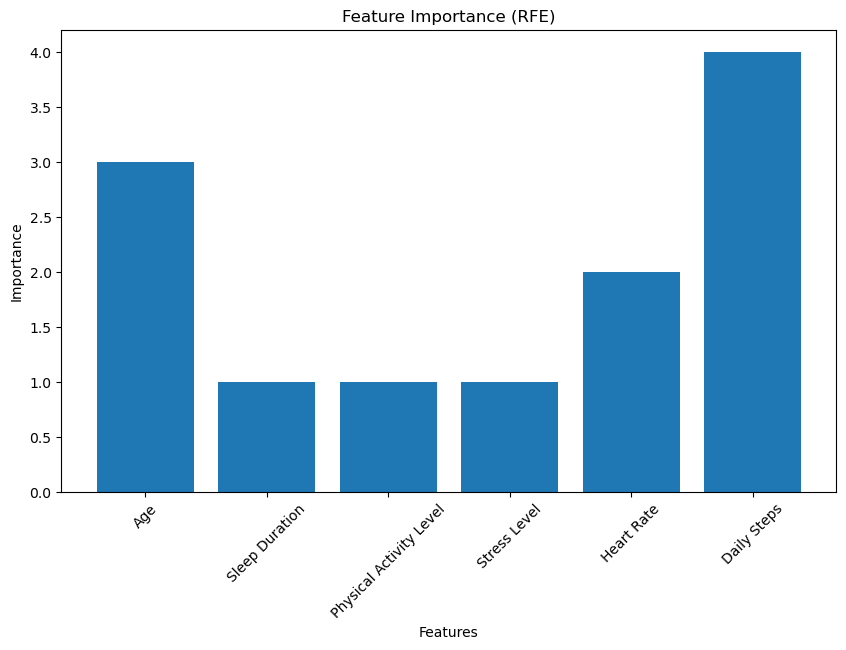

被选中的特征: ['Sleep Duration', 'Physical Activity Level', 'Stress Level']


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 加载数据集
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# 确定数值特征
numerical_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Daily Steps']
X = df[numerical_features]
y = df['Quality of Sleep']  # 假设 'Quality of Sleep' 是目标变量

# 创建逻辑回归模型
model = LogisticRegression(max_iter=1000)

# 使用RFE选择特征
rfe = RFE(estimator=model, n_features_to_select=3)  # 选择3个特征
X_selected = rfe.fit_transform(X, y)

# 获取被选中的特征名称
selected_features = X.columns[rfe.get_support()]

# 绘制特征重要性图
importances = rfe.ranking_
plt.figure(figsize=(10, 6))
plt.bar(numerical_features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (RFE)')
plt.xticks(rotation=45)
plt.show()

print("被选中的特征:", selected_features.tolist())


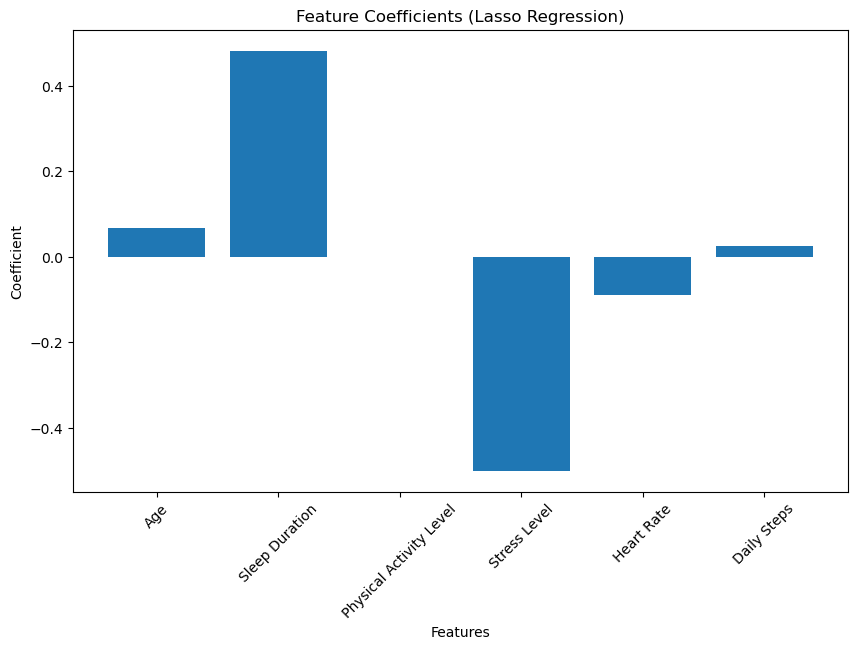

被选中的特征: ['Age', 'Sleep Duration', 'Stress Level', 'Heart Rate', 'Daily Steps']


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 加载数据集
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
# 确定数值特征
numerical_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Daily Steps']
X = df[numerical_features]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建Lasso回归模型
lasso = Lasso(alpha=0.1)  # 调整alpha值以控制正则化强度

# 训练模型
lasso.fit(X_scaled, y)

# 获取特征的重要性（系数）
selected_features = X.columns[np.abs(lasso.coef_) > 1e-5]  # 设置一个阈值来选择重要的特征

# 绘制特征系数图
plt.figure(figsize=(10, 6))
plt.bar(numerical_features, lasso.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients (Lasso Regression)')
plt.xticks(rotation=45)
plt.show()

print("被选中的特征:", selected_features.tolist())
